# Домашнее задание 3. Свёрточные и рекуррентные нейронные сети
## Фамилия Имя Группа

В зависимости от варианта, для решения задачи используйте следующие наборы данных:

<table>
    <thead>
         <tr>
            <th colspan=1>Задача генерации</th>
            <th colspan=5>Задача классификации</th>
        </tr>
        <tr>
            <th> </th>
            <th>A</th>
            <th>B</th>
            <th style="background-color:red; color:white">C</th>
            <th>D</th>
            <th>E</th>
        </tr>
    </thead>
    <tbody>
        <tr>
            <td>K</td>
            <td>1</td>
            <td>2</td>
            <td>3</td>
            <td>4</td>
            <td>5</td>
        </tr>
        <tr>
            <td style="background-color:red; color:white">L</td>
            <td>6</td>
            <td>7</td>
            <td style="background-color:red; color:white">8</td>
            <td>9</td>
            <td>10</td>
        </tr>
        <tr>
            <td>M</td>
            <td>11</td>
            <td>12</td>
            <td>13</td>
            <td>14</td>
            <td>15</td>
        </tr>
        <tr>
            <td>N</td>
            <td>16</td>
            <td>17</td>
            <td>18</td>
            <td>19</td>
            <td>20</td>
        </tr>
        <tr>
            <td>O</td>
            <td>21</td>
            <td>22</td>
            <td>23</td>
            <td>24</td>
            <td>25</td>
        </tr>
    </tbody>
</table>

### Наборы данных

**Задача классификации картинок**

A. [Набор данных "Fashion MNIST"](https://pytorch.org/vision/main/generated/torchvision.datasets.FashionMNIST.html) `torchvision.datasets.FashionMNIST train=True и False`

B. [Набор данных "Текстуры"](https://pytorch.org/vision/main/generated/torchvision.datasets.DTD.html#torchvision.datasets.DTD) `torchvision.datasets.DTD split='train' и 'test'`

C. **[Набор данных "Буквы"](https://pytorch.org/vision/main/generated/torchvision.datasets.EMNIST.html#torchvision.datasets.EMNIST)** `torchvision.datasets.EMNIST split=letters train=True и False`

D. [Набор данных "Кошки и собаки"](https://pytorch.org/vision/main/generated/torchvision.datasets.OxfordIIITPet.html) `torchvision.datasets.OxfordIIITPet split = 'trainval' и 'test'` (объекты разбиты по породам (всего 37 пород), нужно построить бинарный классификатор собак и кошек)

E. [Набор данных "Дорожные знаки"](https://pytorch.org/vision/main/generated/torchvision.datasets.GTSRB.html) `torchvision.datasets.GTSRB split = 'train' и 'test'`


---

**Задача генерации текстов**

K. [Набор данных "Евгений Онегин"]() `onegin.txt`

L. **[Набор данных "Война и Мир"]() `war_and_piece.txt`**

M. [Набор данных "Стихи"]() `stihi.csv`

N. [Набор данных "Сказки"]() `fairytales.txt`

O. [Набор данных "Новости"]() `news.txt` или https://github.com/yutkin/Lenta.Ru-News-Dataset/releases

# 0. Инициализация библиотек

In [ ]:
import torch
import torchvision
import numpy as np
import pandas as pd
import torch.nn as nn
from tqdm import tqdm
from torch import optim
from os.path import exists
import kornia.augmentation as K
import torch.nn.functional as F
import matplotlib.pyplot as plt
from torchsummary import summary
from torch.autograd import Variable
import matplotlib.animation as animation
import torchvision.transforms as transforms

Подсказка по разделению пород на два класса
```
import torchvision

# Все классы
len(torchvision.datasets.OxfordIIITPet(root='data_train', download=True).classes)

# кошки
cats = ['Abyssinian', 'Bengal', 'Birman', 'Bombay', 'British Shorthair', 'Egyptian Mau', 'Maine Coon', 'Persian', 'Ragdoll', 'Russian Blue', 'Siamese', 'Sphynx']

# собаки
dogs = ['American Bulldog', 'American Pit Bull Terrier', 'Basset Hound', 'Beagle', 'Boxer', 'Chihuahua', 'English Cocker Spaniel', 'English Setter', 'German Shorthaired', 'Great Pyrenees',
        'Havanese', 'Japanese Chin', 'Keeshond', 'Leonberger', 'Miniature Pinscher', 'Newfoundland', 'Pomeranian', 'Pug', 'Saint Bernard', 'Samoyed', 'Scottish Terrier', 'Shiba Inu',
        'Staffordshire Bull Terrier', 'Wheaten Terrier', 'Yorkshire Terrier']
```

# 1. Свёрточная нейронная сеть для классификации изображений (9 баллов)

## 1.1 Загрузка данных, разделение на train и test

Загрузите данные при помощи torchvision.datasets. Можете предусмотреть опредлённые транфсофрмации картинки, например, изменение размера до 128 px, кроп по центру в 196 px и преобразование к классу torch.Tensor:

```
import torchvision


transform = torchvision.transforms.Compose([
    # resize
    torchvision.transforms.Resize(128),
    torchvision.transforms.CenterCrop(196),
    torchvision.transforms.ToTensor()
])
```

In [2]:
transform = transforms.Compose([
	transforms.Resize(24),
	transforms.CenterCrop(32),
	transforms.ToTensor()
])

In [3]:
data_train = torchvision.datasets.EMNIST(
	root = './data/letters/', 
	split = "letters", 
	train = True, 
	download = True,
	transform = transform
)

data_test = torchvision.datasets.EMNIST(
	root = './data/letters/', 
	split = "letters", 
	train = False, 
	download = True,
	transform = transform
)

In [4]:
nbatch = 16
trainset = torch.utils.data.DataLoader(
	data_train, 
	batch_size = nbatch, 
	shuffle = True,
	num_workers=2
)
testset = torch.utils.data.DataLoader(
	data_test, 
	batch_size = nbatch, 
	shuffle = False,
	num_workers=2
) 

n o i o n y j n m o o l m n a u


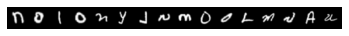

In [5]:
def imshow(img):
    npimg = img.numpy()
    plt.axis("off")
    npimg = np.transpose(npimg,(2, 1, 0))
    plt.imshow(npimg)
    plt.show
    
dataiter = iter(trainset)
images, labels = dataiter.next()

imshow(torchvision.utils.make_grid(images, nrow = 1))

print(" ".join(str(data_train.classes[labels[j]]) for j in range(nbatch)))

## 1.2 Предобработка данных (по необходимости)

## 1.3 Инициализация объекта свёрточной нейронной сети

Создайте нейронную сеть с 2-4 свёрточными слоями. В остальном конфигурация сети может быть произвольной. 

In [8]:
class EmptyLayer(nn.Module):
    def __init__(self):
        super().__init__()
        
    def forward(self, x):
        return x

In [9]:
class CNN(nn.Module):
	def __init__(self, regularization:dict = None):
		super(CNN, self).__init__()
		self.conv1 = nn.Sequential(
			nn.Conv2d(
				in_channels = 1, 
				out_channels = 32, 
				kernel_size = 3,
				stride = 1,
				padding = 1
			),
			nn.ReLU(),
			EmptyLayer() if not regularization else nn.BatchNorm2d(
				32, 
				eps = regularization['eps'], 
				momentum = regularization['momentum']
			),
			nn.MaxPool2d(
				kernel_size = 2,
				stride = 2
			),
		)
		self.conv2 = nn.Sequential(
			nn.Conv2d(
				in_channels = 32, 
				out_channels = 64, 
				kernel_size = 3,
				stride = 1,
				padding = 1
			),
			nn.ReLU(),
			EmptyLayer() if not regularization else nn.BatchNorm2d(
				64, 
				eps = regularization['eps'], 
				momentum = regularization['momentum']
			),
			nn.MaxPool2d(
				kernel_size = 2,
				stride = 2
			),
		)
		self.conv3 = nn.Sequential(
			nn.Conv2d(
				in_channels = 64, 
				out_channels = 128, 
				kernel_size = 3,
				stride = 1,
				padding = 1
			),
			nn.ReLU(),
			nn.Conv2d(
				in_channels = 128, 
				out_channels = 256, 
				kernel_size = 3,
				stride = 1,
				padding = 1
			),
			nn.ReLU(),
			EmptyLayer() if not regularization else nn.BatchNorm2d(
				256, 
				eps = regularization['eps'], 
				momentum = regularization['momentum']
			),
			nn.MaxPool2d(
				kernel_size = 2,
				stride = 2
			),
		)
		self.out = nn.Sequential(
			nn.Linear(256 * 4 * 4, 1024),
			nn.ReLU(),
			EmptyLayer() if not regularization else nn.Dropout(p = regularization['p']),
			nn.Linear(1024, 512),
			nn.ReLU(),
			EmptyLayer() if not regularization else nn.Dropout(p = regularization['p']),
			nn.Linear(512, 27),
		)
			
	def forward(self, x):
		x = self.conv1(x)
		x = self.conv2(x)
		x = self.conv3(x)
		# flatten the output of conv2 to (batch_size, 32 * 7 * 7)
		x = x.view(x.size(0), -1)       
		output = self.out(x)
		return output, x    # return x for visualization		
		


In [11]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
cnn = CNN()
cnn.to(device)
summary(cnn, (1, 32, 32))

Layer (type:depth-idx)                   Output Shape              Param #
├─Sequential: 1-1                        [-1, 32, 16, 16]          --
|    └─Conv2d: 2-1                       [-1, 32, 32, 32]          320
|    └─ReLU: 2-2                         [-1, 32, 32, 32]          --
|    └─EmptyLayer: 2-3                   [-1, 32, 32, 32]          --
|    └─MaxPool2d: 2-4                    [-1, 32, 16, 16]          --
├─Sequential: 1-2                        [-1, 64, 8, 8]            --
|    └─Conv2d: 2-5                       [-1, 64, 16, 16]          18,496
|    └─ReLU: 2-6                         [-1, 64, 16, 16]          --
|    └─EmptyLayer: 2-7                   [-1, 64, 16, 16]          --
|    └─MaxPool2d: 2-8                    [-1, 64, 8, 8]            --
├─Sequential: 1-3                        [-1, 256, 4, 4]           --
|    └─Conv2d: 2-9                       [-1, 128, 8, 8]           73,856
|    └─ReLU: 2-10                        [-1, 128, 8, 8]           --
|    └

Layer (type:depth-idx)                   Output Shape              Param #
├─Sequential: 1-1                        [-1, 32, 16, 16]          --
|    └─Conv2d: 2-1                       [-1, 32, 32, 32]          320
|    └─ReLU: 2-2                         [-1, 32, 32, 32]          --
|    └─EmptyLayer: 2-3                   [-1, 32, 32, 32]          --
|    └─MaxPool2d: 2-4                    [-1, 32, 16, 16]          --
├─Sequential: 1-2                        [-1, 64, 8, 8]            --
|    └─Conv2d: 2-5                       [-1, 64, 16, 16]          18,496
|    └─ReLU: 2-6                         [-1, 64, 16, 16]          --
|    └─EmptyLayer: 2-7                   [-1, 64, 16, 16]          --
|    └─MaxPool2d: 2-8                    [-1, 64, 8, 8]            --
├─Sequential: 1-3                        [-1, 256, 4, 4]           --
|    └─Conv2d: 2-9                       [-1, 128, 8, 8]           73,856
|    └─ReLU: 2-10                        [-1, 128, 8, 8]           --
|    └

## 1.4 Обучение свёрточной нейронной сети для решения задачи классификации

In [12]:
loss_func = nn.CrossEntropyLoss()
#optimizer = optim.SGD(cnn.parameters(), lr=0.001, momentum=0.9)
# optimizer = optim.Adam(cnn.parameters(), lr=0.0001)

In [20]:
def train( 	model: nn.Module,
			dataset:torch.utils.data.DataLoader,
			optimizer:optim.Optimizer,
			lossFunc:nn.Module = nn.CrossEntropyLoss(),
			transformation:K.AugmentationSequential = None):
	# switch model to train state
	model.train()
	# local variables
	__running_loss = 0
	__correct_pred = 0
	__total_pred = 0
	# loop on all batches in dataset
	for data in tqdm(dataset, desc = 'batch', leave = False):
		inputs, labels = data[0].to(device), data[1].to(device)
		if transformation is not None:
			inputs = transformation(inputs)
		# gives batch data, normalize x when iterate train_loader
		output = model(inputs)[0]         
		loss = lossFunc(output, labels)
		# clear gradients for this training step   
		optimizer.zero_grad()           
		# backpropagation, compute gradients 
		loss.backward()                # apply gradients             
		optimizer.step()   
		# 
		predicted = torch.max(output, 1)[1].data.squeeze()
		__running_loss += loss.item()
		__total_pred += labels.size(0)
		__correct_pred += predicted.eq(labels).sum().item()             
		pass
	__train_loss = __running_loss/len(dataset)
	__accuracy = 100.*__correct_pred/__total_pred
	return __train_loss, __accuracy

In [19]:
def test(	model: nn.Module,
			dataset:torch.utils.data.DataLoader,
			lossFunc:nn.Module = nn.CrossEntropyLoss()):
	# Test the model
	model.eval()
	# local variables
	__running_loss = 0
	__correct_pred = 0
	__total_pred = 0

	with torch.no_grad():
		correct = 0
		total = 0
		for data in tqdm(dataset, desc = 'batch', leave = False):
			inputs, labels = data[0].to(device), data[1].to(device)
			output = model(inputs)[0]

			loss = lossFunc(output,labels)
			__running_loss+=loss.item()
			
			predicted = torch.max(output, 1)[1].data.squeeze()
			__total_pred += labels.size(0)	
			__correct_pred += predicted.eq(labels).sum().item()
			pass
	pass
	__test_loss = __running_loss/len(dataset)
	__accuracy = 100.*__correct_pred/__total_pred
	return __test_loss, __accuracy

In [21]:
def trainF(	model: nn.Module,
			dataset:torch.utils.data.DataLoader,
			dumpName: str, 
			optimizer:optim.Optimizer,
			lossFunc:nn.Module = nn.CrossEntropyLoss(),
			maxEpochs: int = 100,
			transformation:K.AugmentationSequential = None,
			loadAndTrain: bool = False):
	# load previous state
	if loadAndTrain and exists(f'./model/{dumpName}.dump'):
		model.load_state_dict(torch.load(f'./model/{dumpName}.dump'))
	# train the model
	__trainLoss = []
	__trainAccuracy = []
	# loop on epochs
	print ("{:^13} {:^10} {:^10}".format('Epoch', 'Loss', 'Accuracy'))	
	for epoch in range(maxEpochs):
		__loss, __accur = train(
			model = model, 
			dataset = dataset,
			optimizer = optimizer,
			lossFunc = lossFunc,
			transformation = transformation
		)
		__trainLoss.append(__loss)
		__trainAccuracy.append(__accur)
		print ('[{:>5}/{:<5}] {:^10.4f} {:^10.4f}'.format(epoch + 1, maxEpochs, __loss, __accur))
	pass
	torch.save(model.state_dict(), f'./model/{dumpName}.dump')
	return __lossHistory, __accurHistory
	

In [22]:
def trainNtest(	model: nn.Module,
				datasets: [torch.utils.data.DataLoader, torch.utils.data.DataLoader],
				dumpName: str, 
				optimizer:optim.Optimizer,
				lossFunc:nn.Module = nn.CrossEntropyLoss(),
				maxEpochs: int = 100,
				transformation:K.AugmentationSequential = None,
				loadNtrain: bool = False):
	# load previous state
	if loadNtrain and exists(f'./model/{dumpName}.dump'):
		model.load_state_dict(torch.load(f'./model/{dumpName}.dump'))
	# local variables
	__trainLoss = []
	__trainAccuracy = []
	__testLoss = []
	__testAccuracy = []
	# loop on epochs
	print ("{:^13} {:^10} {:^10}".format('Epoch', 'Loss', 'Accuracy'), end='')
	for epoch in range(maxEpochs):
		# train model 
		__loss, __accur = train(
			model = model, 
			dataset = datasets[0],
			optimizer = optimizer,
			lossFunc = lossFunc,
			transformation = transformation
		)
		__trainLoss.append(__loss)
		__trainAccuracy.append(__accur)
		print ('[{:>5}/{:<5}] {:^10.4f} {:^10.4f}'.format(epoch + 1, maxEpochs, __loss, __accur))
		# test model 
		__loss, __accur = test(
			model = model, 
			dataset = datasets[1],
			lossFunc = lossFunc
		)
		__testLoss.append(__loss)
		__testAccuracy.append(__accur)
	pass
	torch.save(model.state_dict(), f'./model/{dumpName}.dump')
	return __trainLoss, __trainAccuracy, __testLoss, __testAccuracy


In [14]:
num_epochs = 100
loadAndTrain = False
trainLoss, trainAccuracy, testLoss, testAccuracy = trainNtest(
	model = cnn,
	datasets = [trainset, testset],
	dumpName = 'cnn_1',
	optimizer = optim.SGD(cnn.parameters(), lr=0.001, momentum=0.9),
	maxEpochs = num_epochs,
	loadNtrain = loadAndTrain
)

    Epoch        Loss     Accuracy 

[    1/100  ]   1.7599    47.2252  


[    2/100  ]   0.3392    88.7043  


[    3/100  ]   0.2463    91.6178  


[    4/100  ]   0.2049    92.8397  


[    5/100  ]   0.1806    93.5697  


[    6/100  ]   0.1602    94.2300  


[    7/100  ]   0.1439    94.8109  


[    8/100  ]   0.1309    95.1050  


[    9/100  ]   0.1198    95.5184  


[   10/100  ]   0.1085    95.8542  


[   11/100  ]   0.0992    96.1458  


[   12/100  ]   0.0917    96.3389  


[   13/100  ]   0.0841    96.6186  


[   14/100  ]   0.0782    96.8005  


[   15/100  ]   0.0737    96.9231  


[   16/100  ]   0.0691    97.0777  


[   17/100  ]   0.0659    97.2123  


[   18/100  ]   0.0618    97.3486  


[   19/100  ]   0.0576    97.5024  


[   20/100  ]   0.0550    97.5721  


[   21/100  ]   0.0554    97.6050  


[   22/100  ]   0.0545    97.6426  


[   23/100  ]   0.0486    97.8654  


[   24/100  ]   0.0476    97.9303  


[   25/100  ]   0.0501    97.8341  


[   26/100  ]   0.0473    97.9071  


[   27/100  ]   0.0421    98.0954  


[   28/100  ]   0.0440    98.0865  


[   29/100  ]   0.0448    98.0481  


[   30/100  ]   0.0442    98.0561  


[   31/100  ]   0.0405    98.2155  


[   32/100  ]   0.0397    98.2332  


[   33/100  ]   0.0385    98.2845  


[   34/100  ]   0.0385    98.3381  


[   35/100  ]   0.0362    98.4030  


[   36/100  ]   0.0305    98.6186  


[   37/100  ]   0.0283    98.6595  


[   38/100  ]   0.0395    98.3229  


[   39/100  ]   0.0338    98.4984  


[   40/100  ]   0.0320    98.5938  


[   41/100  ]   0.0344    98.5280  


[   42/100  ]   0.0302    98.6827  


[   43/100  ]   0.0278    98.7716  


[   44/100  ]   0.0283    98.7644  


[   45/100  ]   0.0330    98.5905  


[   46/100  ]   0.0306    98.7011  


[   47/100  ]   0.0315    98.6795  


[   48/100  ]   0.0301    98.7284  


[   49/100  ]   0.0240    98.9471  


[   50/100  ]   0.0227    99.0272  


[   51/100  ]   0.0208    99.0817  


[   52/100  ]   0.0221    99.0521  


[   53/100  ]   0.0250    98.9631  


[   54/100  ]   0.0229    99.0577  


[   55/100  ]   0.0214    99.0954  


[   56/100  ]   0.0201    99.1667  


[   57/100  ]   0.0191    99.1939  


[   58/100  ]   0.0204    99.1627  


[   59/100  ]   0.0209    99.1843  


[   60/100  ]   0.0269    98.9519  


[   61/100  ]   0.0276    98.9391  


[   62/100  ]   0.0245    99.0321  


[   63/100  ]   0.0199    99.2212  


[   64/100  ]   0.0159    99.3862  


[   65/100  ]   0.0149    99.4135  


[   66/100  ]   0.0117    99.5152  


[   67/100  ]   0.0105    99.5585  


[   68/100  ]   0.0121    99.5521  


[   69/100  ]   0.0194    99.2724  


[   70/100  ]   0.0193    99.2925  


[   71/100  ]   0.0206    99.2324  


[   72/100  ]   0.0208    99.2420  


[   73/100  ]   0.0174    99.4046  


[   74/100  ]   0.0129    99.5192  


[   75/100  ]   0.0153    99.4567  


[   76/100  ]   0.0145    99.4696  


[   77/100  ]   0.0205    99.3165  


[   78/100  ]   0.0152    99.4856  


[   79/100  ]   0.0109    99.6098  


[   80/100  ]   0.0100    99.6530  


[   81/100  ]   0.0103    99.6506  


[   82/100  ]   0.0075    99.7540  


[   83/100  ]   0.0083    99.7260  


[   84/100  ]   0.0068    99.7548  


[   85/100  ]   0.0087    99.6963  


[   86/100  ]   0.0079    99.7268  


[   87/100  ]   0.0124    99.6050  


[   88/100  ]   0.0154    99.5032  


[   89/100  ]   0.0112    99.6667  


[   90/100  ]   0.0082    99.7412  


[   91/100  ]   0.0111    99.6506  


[   92/100  ]   0.0118    99.6218  


[   93/100  ]   0.0098    99.7308  


[   94/100  ]   0.0086    99.7356  


[   95/100  ]   0.0047    99.8606  


[   96/100  ]   0.0024    99.9543  


[   97/100  ]   0.0049    99.8662  


[   98/100  ]   0.0028    99.9319  


[   99/100  ]   0.0064    99.8269  


[  100/100  ]   0.0066    99.7861  


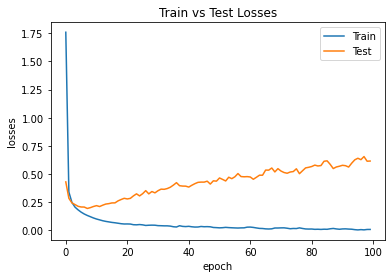

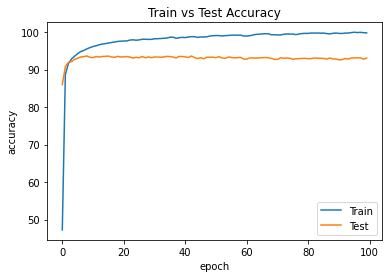

In [15]:
plt.plot(trainLoss, label='Train')
plt.plot(testLoss, label='Test')
plt.ylabel('losses')
plt.xlabel('epoch')
plt.title('Train vs Test Losses')
plt.legend()
plt.show()

plt.plot(trainAccuracy, label='Train')
plt.plot(testAccuracy, label='Test')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.title('Train vs Test Accuracy')
plt.legend()
plt.show()

## 1.5 Агументация данных и регулряизация нейросети

Попобуйте добавить аугументацию (случайные повороты, увеличение, уменьшение) в данные, а также регуляризацию (Drop out и Batch Norm слои) в модель. Как меняется метрика accuracy на обучающей и тестовой выборке в процессе обучения? Постройте график.

In [23]:
randTransform = K.AugmentationSequential(
	K.RandomPerspective(),
	K.RandomAffine(degrees=(-180, 180), scale = (0.5, 1)),
	K.RandomResizedCrop((32,32), scale = (0.2, 1)),
	K.RandomCrop((32,32), padding = 4),
	K.RandomVerticalFlip(),
	K.RandomHorizontalFlip(),
	data_keys = ["Input"],
	random_apply = (1,),
	same_on_batch = False
)

i r d u t m b l u w y t x p y a


C:\Users\Perihelion\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\torch\functional.py:568: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at  ..\aten\src\ATen\native\TensorShape.cpp:2228.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


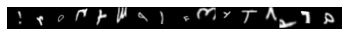

In [17]:
dataiter = iter(trainset)
images, labels = dataiter.next()
images = randTransform(images)

imshow(torchvision.utils.make_grid(images, nrow = 1))

print(" ".join(str(data_train.classes[labels[j]]) for j in range(nbatch)))

In [18]:
cnnR = CNN(
	regularization={
		'eps': 0.00001,		# default 'eps': 0.00001
		'momentum': 0.1, 	# default 'momentum': 0.1
		'p': 0.5			# default 'p': 0.5
	}
)
cnnR.to(device)
summary(cnnR, (1, 32, 32))

Layer (type:depth-idx)                   Output Shape              Param #
├─Sequential: 1-1                        [-1, 32, 16, 16]          --
|    └─Conv2d: 2-1                       [-1, 32, 32, 32]          320
|    └─BatchNorm2d: 2-2                  [-1, 32, 32, 32]          64
|    └─ReLU: 2-3                         [-1, 32, 32, 32]          --
|    └─MaxPool2d: 2-4                    [-1, 32, 16, 16]          --
├─Sequential: 1-2                        [-1, 64, 8, 8]            --
|    └─Conv2d: 2-5                       [-1, 64, 16, 16]          18,496
|    └─BatchNorm2d: 2-6                  [-1, 64, 16, 16]          128
|    └─ReLU: 2-7                         [-1, 64, 16, 16]          --
|    └─MaxPool2d: 2-8                    [-1, 64, 8, 8]            --
├─Sequential: 1-3                        [-1, 256, 4, 4]           --
|    └─Conv2d: 2-9                       [-1, 128, 8, 8]           73,856
|    └─BatchNorm2d: 2-10                 [-1, 128, 8, 8]           256
|   

Layer (type:depth-idx)                   Output Shape              Param #
├─Sequential: 1-1                        [-1, 32, 16, 16]          --
|    └─Conv2d: 2-1                       [-1, 32, 32, 32]          320
|    └─BatchNorm2d: 2-2                  [-1, 32, 32, 32]          64
|    └─ReLU: 2-3                         [-1, 32, 32, 32]          --
|    └─MaxPool2d: 2-4                    [-1, 32, 16, 16]          --
├─Sequential: 1-2                        [-1, 64, 8, 8]            --
|    └─Conv2d: 2-5                       [-1, 64, 16, 16]          18,496
|    └─BatchNorm2d: 2-6                  [-1, 64, 16, 16]          128
|    └─ReLU: 2-7                         [-1, 64, 16, 16]          --
|    └─MaxPool2d: 2-8                    [-1, 64, 8, 8]            --
├─Sequential: 1-3                        [-1, 256, 4, 4]           --
|    └─Conv2d: 2-9                       [-1, 128, 8, 8]           73,856
|    └─BatchNorm2d: 2-10                 [-1, 128, 8, 8]           256
|   

## 1.6 Обучение нейросети на данных с аугументацией 

In [ ]:
num_epochs = 100
loadAndTrain = False
trainLossR, trainAccuracyR, testLossR, testAccuracyR = trainNtest(
	model = cnnR,
	datasets = [trainset, testset],
	dumpName = 'cnn_2',
	optimizer = optim.SGD(cnnR.parameters(), lr=0.001, momentum=0.9),
	maxEpochs = num_epochs,
	loadNtrain = loadAndTrain,
	transformation = randTransform
)

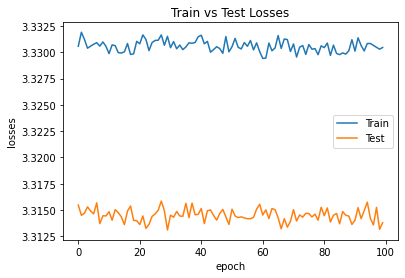

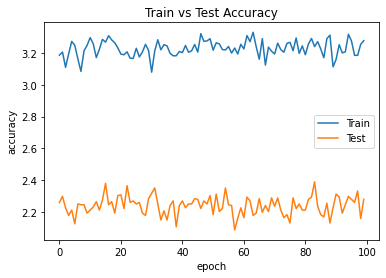

In [20]:
plt.plot(trainLossR, label='Train')
plt.plot(testLossR, label='Test')
plt.ylabel('losses')
plt.xlabel('epoch')
plt.title('Train vs Test Losses')
plt.legend()
plt.show()

plt.plot(trainAccuracyR, label='Train')
plt.plot(testAccuracyR, label='Test')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.title('Train vs Test Accuracy')
plt.legend()
plt.show()

## 1.7 Выводы

> Что удалось попробовать? Что получилось, а что — нет? Повлияло ли добавление аугументации на качество?

В ходе выполения задания была создана структура свёрточной нейронной сети, основой которой послужила AlexNet. Обучение собственной нейронной сети дало результаты, представленные на графиках. Регуляриязация должна была привести к тому, что увеличивается точноть классификации, что в совокупности с аугментацией тренировочных датасетов давало бы преимущество, однако, как показывают графики, 

# 2. Рекуррентная нейронная сеть для генерации текстов (9 баллов)

## 2.1 Загрузка данных



In [3]:
from src.text_generator import RNNTextGenerator
from src.dataset import Dataset
import tensorflow as tf
tf.compat.v1.disable_eager_execution()

In [4]:
seq_length = 25
batch_size = 25
learning_rate = 0.01
epoch = 5

## 2.2 Преодбработка/нормализация данных по необходимости

Например, можно привести все слова к нижнему регистру

In [5]:
dataset = Dataset(['./data/war_and_piece.txt'], seq_length)

## 2.3 Инициализация объекта рекуррентной нейронной сети

In [ ]:
model = RNNTextGenerator(
	seq_length,
	dataset.vocab_size,
	learning_rate=learning_rate,
	epoch=epoch,
	batch_size=batch_size,
)

## 2.4 Обучение обычной рекуррентной нейронной сети

In [8]:
scores = model.fit(dataset, save_scores=True)

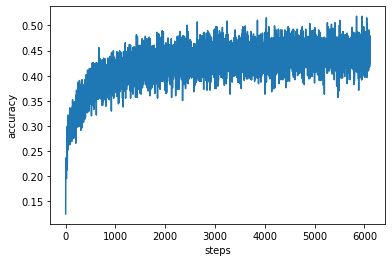

In [16]:
scores['accuracy'].plot()
plt.ylabel('accuracy')
plt.xlabel('steps')
plt.show()

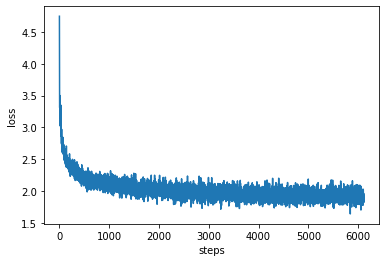

In [17]:
scores['loss'].plot()
plt.ylabel('loss')
plt.xlabel('steps')
plt.show()

## 2.5 Генерация текстов при помощи обычной рекуррентной сети

In [21]:
start_seq = 'Как в  вопросе астрономии  тогда'
print('>>>>>>\n{}'.format(start_seq))
print(model.generate(
	dataset,
	start_seq,
	50
))
print('<<<<<<')

>>>>>>
Как в  вопросе астрономии  тогда
INFO:tensorflow:./model\RNNTextGenerator.data-00000-of-00001
INFO:tensorflow:500
INFO:tensorflow:./model\RNNTextGenerator.index
INFO:tensorflow:500
INFO:tensorflow:./model\RNNTextGenerator.meta
INFO:tensorflow:600


g:\My_Files\BMSTU\4 курс\8 семестр\Обнаружение и распознавание сигналов\Домашние работы\Домашняя работа №3\hw03\src\text_generator.py:103: UserWarning: `tf.nn.rnn_cell.BasicRNNCell` is deprecated and will be removed in a future version. This class is equivalent as `tf.keras.layers.SimpleRNNCell`, and will be replaced by that in Tensorflow 2.0.
  self._tf_rnn_cell = rnn_cell(
g:\My_Files\BMSTU\4 курс\8 семестр\Обнаружение и распознавание сигналов\Домашние работы\Домашняя работа №3\hw03\src\text_generator.py:112: UserWarning: `tf.layers.dense` is deprecated and will be removed in a future version. Please use `tf.keras.layers.Dense` instead.
  logits = tf.compat.v1.layers.dense(


INFO:tensorflow:Restoring parameters from ./model/RNNTextGenerator
 в  мосто Наполузясь  все любий  того шутся  смге 
<<<<<<


## 2.6 Обучение рекуррентной нейронной сети с LSTM-ячейками

In [ ]:
modelLSTM = RNNTextGenerator(
	seq_length,
	dataset.vocab_size,
	learning_rate = learning_rate,
	epoch = epoch,
	batch_size = batch_size,
	name = 'RNNLSTMTextGenerator',
	rnn_cell = tf.compat.v1.nn.rnn_cell.LSTMCell,
)

In [1]:
start_seq = 'Как в  вопросе астрономии  тогда'
print('>>>>>>\n{}'.format(start_seq))
print(modelLSTM.generate(
	dataset,
	start_seq,
	50
))
print('<<<<<<')

>>>>>>
Как в  вопросе астрономии  тогда


NameError: name 'modelLSTM' is not defined

## 2.7 Генерация текстов с разной температурой

Попробуйте сгенерировать тексты с температурой из списка: `[0.1, 0.2, 0.4, 0.6, 0.8, 1.0]` (см. нотубук с семинара по RNN)

## 2.8 Выводы